In [15]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [16]:
# def smoothen(waypoints):
#     optimumpointlist = []
#     i = 0
#     range_factor = 6
#     avg_factor = 2 * range_factor + 1
#     num_of_waypoints = len(waypoints)

#     for point in waypoints:
#         counter = 0
#         estimated_x_cord = point[0]
#         estimated_y_cord = point[1]
#         while counter < range_factor:
#             estimated_x_cord += waypoints[(i + (counter + 1)) % num_of_waypoints][0]
#             estimated_x_cord += waypoints[(i - (counter + 1)) % num_of_waypoints][0]

#             estimated_y_cord += waypoints[(i + (counter + 1)) % num_of_waypoints][1]
#             estimated_y_cord += waypoints[(i - (counter + 1)) % num_of_waypoints][1]
#             counter += 1

#         estimated_x_cord = estimated_x_cord / avg_factor
#         estimated_y_cord = estimated_y_cord / avg_factor


#         optimumpointlist.append(np.array( (estimated_x_cord, estimated_y_cord) ))

#         i += 1
#     return np.array(optimumpointlist)

In [17]:
# def calc_distance(prev_point, next_point):
#     delta_x = next_point[0] - prev_point[0]
#     delta_y = next_point[1] - prev_point[1]
#     return math.hypot(delta_x, delta_y)

# def smooth_central_line(center_line, max_offset, pp=0.10, p=0.05, c=0.70, n=0.05, nn=0.10, iterations=72, skip_step=1):
#     if max_offset < 0.0001:
#         return center_line
#     if skip_step < 1:
#         skip_step = 1
#     smoothed_line = center_line
#     for i in range(0, iterations):
#         smoothed_line = smooth_central_line_internal(center_line, max_offset, smoothed_line, pp, p, c, n, nn, skip_step)
#     return smoothed_line


# def smooth_central_line_internal(center_line, max_offset, smoothed_line, pp, p, c, n, nn, skip_step):
#     length = len(center_line)
#     new_line = [[0.0 for _ in range(2)] for _ in range(length)]
#     for i in range(0, length):
#         wpp = smoothed_line[(i - 2 * skip_step + length) % length]
#         wp = smoothed_line[(i - skip_step + length) % length]
#         wc = smoothed_line[i]
#         wn = smoothed_line[(i + skip_step) % length]
#         wnn = smoothed_line[(i + 2 * skip_step) % length]
#         new_line[i][0] = pp * wpp[0] + p * wp[0] + c * wc[0] + n * wn[0] + nn * wnn[0]
#         new_line[i][1] = pp * wpp[1] + p * wp[1] + c * wc[1] + n * wn[1] + nn * wnn[1]
#         while calc_distance(new_line[i], center_line[i]) >= max_offset:
#             new_line[i][0] = (0.98 * new_line[i][0]) + (0.02 * center_line[i][0])
#             new_line[i][1] = (0.98 * new_line[i][1]) + (0.02 * center_line[i][1])
#     return new_line

In [18]:
TRACK_NAME = 'C:/Users/suraj/projects/deepracer24/FS_June2020.npy'

# Load the center, inner, outer waypoints
waypoints = np.load(TRACK_NAME)

center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

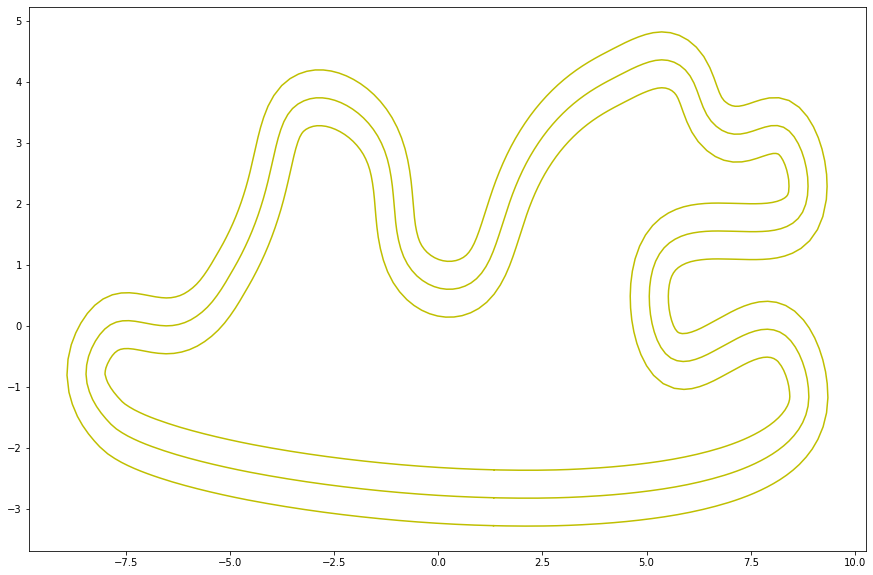

In [19]:
plt.plot(center_line[:,0], center_line[:,1], label = 'outer_border', c = 'y')
plt.plot(inner_border[:,0], inner_border[:,1], label = 'outer_border', c = 'y')
plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'y')
# plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'outer_border', c = 'k')
# for i, point in enumerate(smooth_path):
#     point = list(point)        
#     plt.scatter(point[0], point[1], s = optimal_velocity_[i]*10, c = 'k' if optimal_velocity_[i]<2 else 'r')

# plt.scatter(target[0], target[1], c = 'g', s = 5)
# i = 100
# p1 = inner_border[i]
# p2 = outer_border[i]

# plt.scatter(p1[0], p1[1], label = 'inner border point', c = 'r', s = 10)
# plt.scatter(p2[0], p2[1], label = 'outer border point', c = 'r', s = 10)

plt.show()

In [20]:
from reward_function import Utils, SpeedUtils, SteeringUtils, Path, SmoothPath, reward_function

In [21]:
len(center_line)

354

In [22]:
# smooth_path = smoothen(center_line)
path_object = Path( center_line, 2 )
smooth_path = path_object.get()
# smooth_path = SmoothPath( center_line, 1.07*0.45*0.5,skip_step=1 )
# smooth_path_45 = smooth_central_line( center_line, 1.07*0.45*0.5,skip_step=1 )
smooth_path = np.array( [ np.array(point) for point in smooth_path ] )
# smooth_path_45 = np.array( [ np.array(point) for point in smooth_path_45 ] )
# smooth_path = up_sample(smooth_path, 10)

In [23]:
def circle_radius(coords):

    # Flatten the list and assign to variables (makes code easier to read later)
    x1, y1, x2, y2, x3, y3 = [i for sub in coords for i in sub]

    a = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    b = (x1**2+y1**2)*(y3-y2) + (x2**2+y2**2)*(y1-y3) + (x3**2+y3**2)*(y2-y1)
    c = (x1**2+y1**2)*(x2-x3) + (x2**2+y2**2)*(x3-x1) + (x3**2+y3**2)*(x1-x2)
    d = (x1**2+y1**2)*(x3*y2-x2*y3) + (x2**2+y2**2) * \
        (x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1-x1*y2)

    # In case a is zero (so radius is infinity)
    try:
        r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5
    except:
        r = 999

    return r

def circle_indexes(mylist, index_car, add_index_1=0, add_index_2=0):

    list_len = len(mylist)

    # if index >= list_len:
    #     raise ValueError("Index out of range in circle_indexes()")

    # Use modulo to consider that track is cyclical
    index_1 = (index_car + add_index_1) % list_len
    index_2 = (index_car + add_index_2) % list_len

    return [index_car, index_1, index_2]

def optimal_velocity(track, min_speed, max_speed, look_ahead_points):

    # Calculate the radius for every point of the track
    radius = []
    for i in range(len(track)):
        indexes = circle_indexes(track, i, add_index_1=-1, add_index_2=1)
        coords = [track[indexes[0]],
                  track[indexes[1]], track[indexes[2]]]
        radius.append(circle_radius(coords))

    # Get the max_velocity for the smallest radius
    # That value should multiplied by a constant multiple
    v_min_r = min(radius)**0.5
    constant_multiple = min_speed / v_min_r
    print(f"Constant multiple for optimal speed: {constant_multiple}")

    if look_ahead_points == 0:
        # Get the maximal velocity from radius
        max_velocity = [(constant_multiple * i**0.5) for i in radius]
        # Get velocity from max_velocity (cap at MAX_SPEED)
        velocity = [min(v, max_speed) for v in max_velocity]
        return velocity

    else:
        # Looks at the next n radii of points and takes the minimum
        # goal: reduce lookahead until car crashes bc no time to break
        LOOK_AHEAD_POINTS = look_ahead_points
        radius_lookahead = []
        for i in range(len(radius)):
            next_n_radius = []
            for j in range(LOOK_AHEAD_POINTS+1):
                index = circle_indexes(
                    mylist=radius, index_car=i, add_index_1=j)[1]
                next_n_radius.append(radius[index])
            radius_lookahead.append(min(next_n_radius))
        max_velocity_lookahead = [(constant_multiple * i**0.5)
                                  for i in radius_lookahead]
        velocity_lookahead = [min(v, max_speed)
                              for v in max_velocity_lookahead]
        return velocity_lookahead

In [81]:
# optimal_speeds, tp, angleChange = optimalSpeed()
optimal_velocity_ =  SpeedUtils.optimal_velocity(smooth_path, 1.4, 4.0, 8)
# optimal_velocity_ =  optimal_velocity(smooth_path, 1, 4.0, 1)

In [82]:
# import pandas as pd

# data = pd.read_csv('C:/Users/suraj/projects/deepracer24/deepracer-log-guru/logs/033/training_data.csv')
# status_col = 'episode_status' if 'episode_status' in data.columns else 'status'
# data = data[data[status_col].isin(['in_progress', 'on_track'])]
# data.rename(columns={'X':'x', 'Y':'y', 'yaw':'heading', 'steer':'steering_angle', 'throttle':'speed', 'closest_waypoint': 'closest_waypoints'}, inplace=True)
# data['is_offtrack'] = ~data['on_track']
# data['is_crashed'] = False
# data = data[['x', 'y', 'heading', 'speed', 'steering_angle', 'progress', 'closest_waypoints', 'steps', 'is_offtrack', 'is_crashed']]
# data.shape

In [83]:
# data = data[data['is_offtrack']==True]
# data.shape

In [84]:
# def get_params(row_number):
#     params = data.iloc[row_number].to_dict()
#     params['closest_waypoints'] = [ params['closest_waypoints'], params['closest_waypoints']+1 ]
#     # print(params)

#     params['waypoints'] = list( [list(point) for point in center_line] )
#     params['track_width'] = 1.07
#     params['is_reversed'] = False

#     return params

In [85]:
# params = get_params(805)
# print(params)
# print( reward_function( params ) )

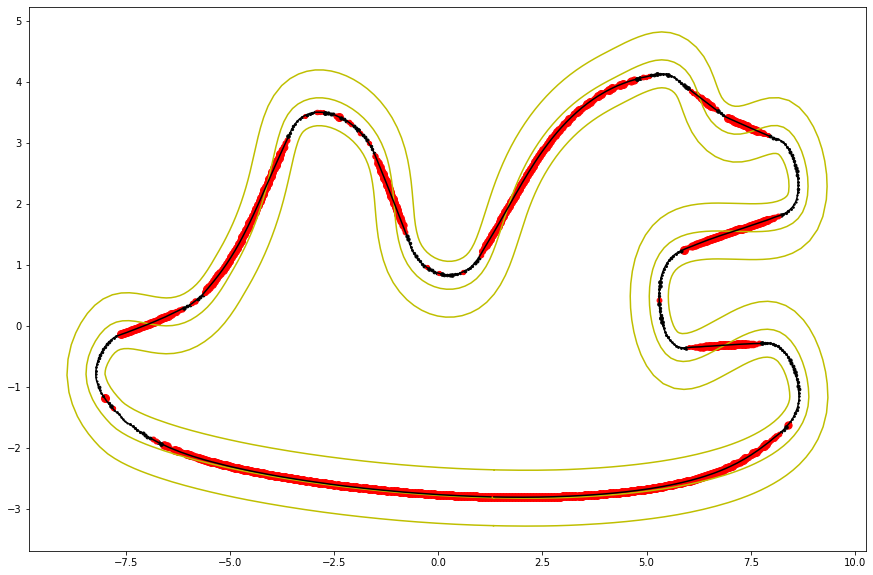

In [86]:
plt.plot(center_line[:,0], center_line[:,1], label = 'outer_border', c = 'y')
plt.plot(inner_border[:,0], inner_border[:,1], label = 'outer_border', c = 'y')
plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'y')
plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'outer_border', c = 'k')
for i, point in enumerate(smooth_path):
    point = list(point)        
    try:
        plt.scatter(point[0], point[1], s = optimal_velocity_[i]**3, c = 'k' if optimal_velocity_[i]<2.5 else 'r')
    except:
        print(point)

plt.show()

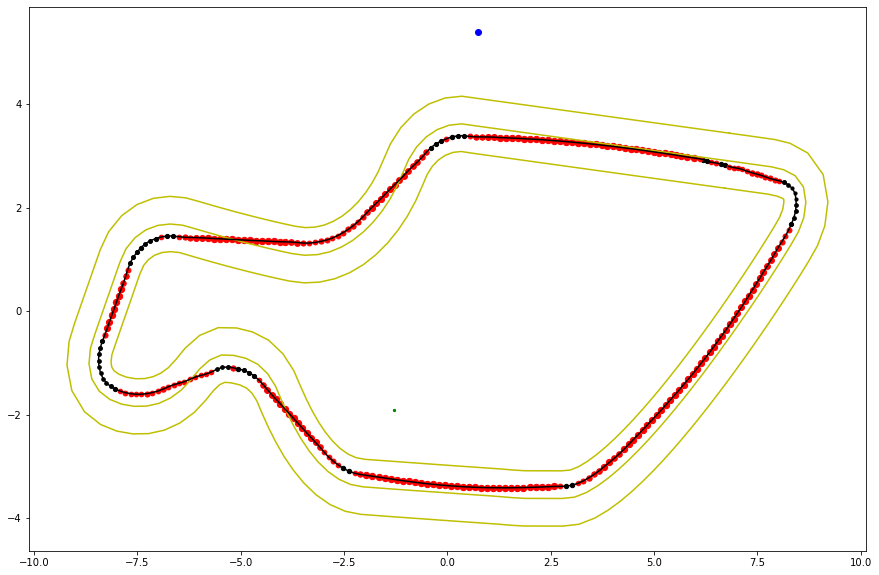

In [16]:
# target = [-1.2972613775941606, -1.908002357052378]
# plt.scatter(params['x'], params['y'], c = 'b')


# plt.plot(center_line[:,0], center_line[:,1], label = 'outer_border', c = 'y')
# plt.plot(inner_border[:,0], inner_border[:,1], label = 'outer_border', c = 'y')
# plt.plot(outer_border[:,0], outer_border[:,1], label = 'outer_border', c = 'y')
# plt.plot(smooth_path[:,0], smooth_path[:,1], label = 'outer_border', c = 'k')
# for i, point in enumerate(smooth_path):
#     point = list(point)        
#     plt.scatter(point[0], point[1], s = optimal_velocity_[i]*10, c = 'k' if optimal_velocity_[i]<2 else 'r')

# plt.scatter(target[0], target[1], c = 'g', s = 5)

# plt.show()


In [19]:
rewards = []
for i in random.sample(range(0, len(data)), 500):
    params = get_params(i)
    rewards.append( reward_function( params ) )
    if i%50 == 0:
        print(i, ' rows done')
rewards_df = pd.DataFrame({'rewards':rewards})

----------------------------------------------------------------------------------------------------
parmas:  {'x': -1.0715, 'y': -5.3205, 'heading': -0.5778, 'speed': 1.5, 'steering_angle': 0, 'progress': 0.3837, 'closest_waypoints': [117, 118], 'steps': 3, 'is_offtrack': False, 'is_crashed': False, 'track_width': 1.07, 'is_reversed': False}
----------------------------------------------------------------------------------------------------
steering_reward:  0.001 distance_reward:  0.001 speed_reward:  0.16666666666666663 total:  0.16866666666666663
----------------------------------------------------------------------------------------------------
parmas:  {'x': -3.5121, 'y': 1.3321, 'heading': -64.3645, 'speed': 2.4, 'steering_angle': 15, 'progress': 24.0595, 'closest_waypoints': [54, 55], 'steps': 39, 'is_offtrack': False, 'is_crashed': False, 'track_width': 1.07, 'is_reversed': False}
-------------------------------------------------------------------------------------------------

In [18]:
rewards_df.describe()

,rewards
count,50.000000
mean,0.469744
std,0.902180
min,-2.000000
25%,0.424897
50%,0.645275
75%,0.872788
max,1.876758


In [69]:
def normalize_reward(reward):
    old_value = reward
    old_min = 0.17
    old_max = 2.5
    new_min = -1
    new_max = 1
    new_value = ( (old_value - old_min) / float(old_max - old_min) ) * (new_max - new_min) + new_min
    return new_value

# rs = [normalize_reward(r) for r in compare_df['new'].tolist()]
normalize_reward(3.5)

1.8583690987124464

In [48]:
# y = lambda x: ( 1/( (1+float(abs(x)) ) ) - 0.25 ) * 1.3333333
steering_reward = lambda x: 1 - abs(x)/60.0
speed_reward    = lambda x: 1 - abs(x)/3.0
ontrack_reward  = lambda x: max(1e-3, 1 - (abs(x)/(1.07)))
total_reward    = lambda x: steering_reward(x) + speed_reward(x) + ontrack_reward(x)
y = total_reward

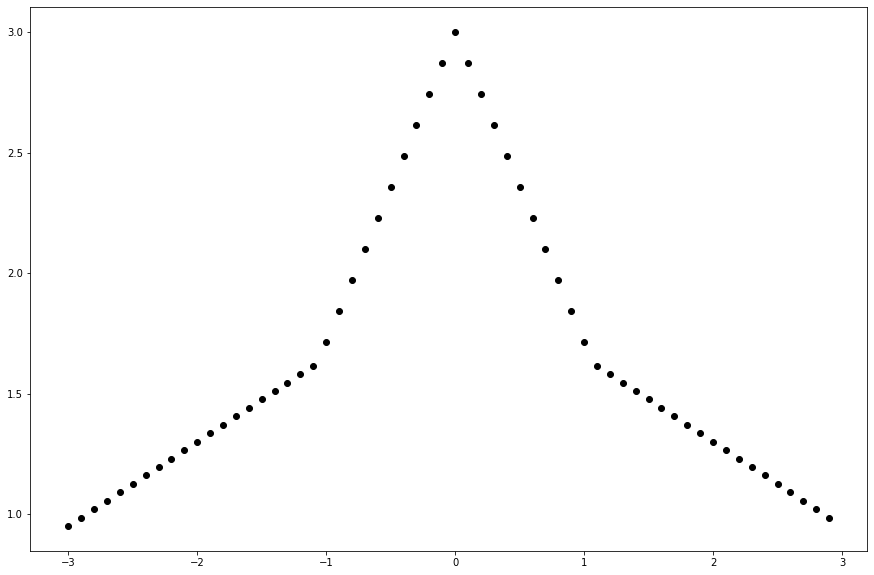

In [49]:
for i in range(-30, 30):
    x = i/10
    plt.scatter(x, y(x),c='k')
    # plt.scatter(x, 1 - abs(x/60), c='b')
plt.show()

In [72]:
# print(max(1-abs(0.8), 1e-3))
y(1.5)

0.19999999500000004

In [73]:
optimal_speed_penalty = lambda diff, optimal_speed: max(0, 1 - abs(diff) / optimal_speed)

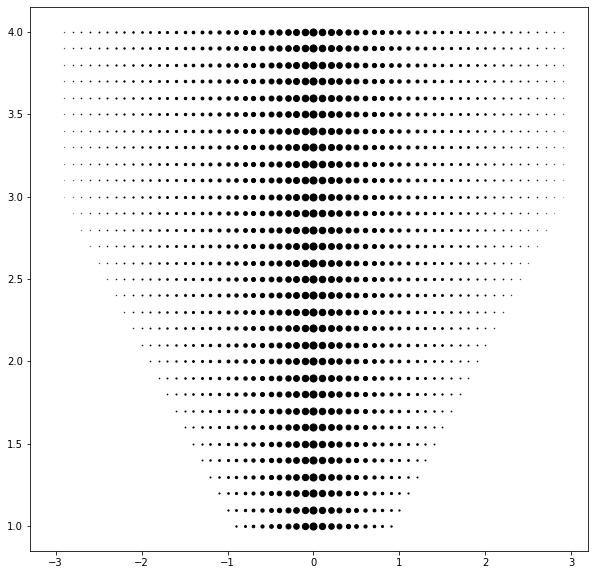

In [74]:
for diff in range(-30, 30):
    diff = diff/10
    for optimal_velocity in range(10, 41):
        optimal_velocity = optimal_velocity/10
        penalty = optimal_speed_penalty(diff, optimal_velocity)
        
        reward = y(diff) * penalty
        plt.scatter(diff, optimal_velocity, s = reward*50 , c = 'k')
plt.show()

In [75]:
sp = Path(center_line).get()

In [76]:
closest = Path(center_line).closest((params['x'], params['y']), 2)
prev = closest[0]
nex = closest[1]

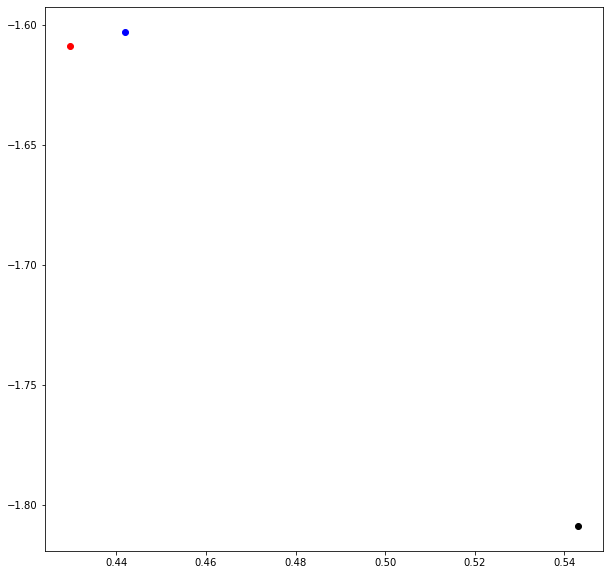

In [77]:
plt.scatter(params['x'], params['y'], c = 'k')
plt.scatter(prev[0], prev[1], c = 'b')
plt.scatter(nex[0], nex[1], c = 'r')
plt.show()

In [78]:
Utils.distanceFromLine(prev, nex, (params['x'], params['y']))

0.22943080917732178

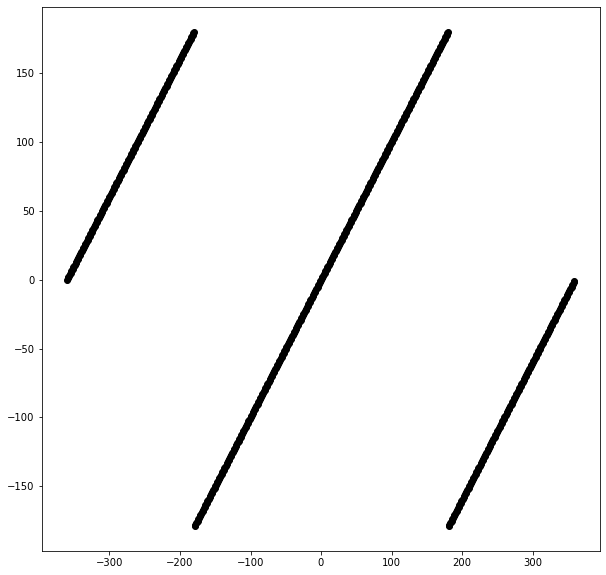

In [79]:
for angle in range(-360, 360):
    plt.scatter(angle, Utils.normalize_angle(angle), c = 'k')
plt.show()

In [80]:
from reward_function import Utils

Utils.normalize_angle( Utils.angle_between_points( (1, 1), (0, 0) ) - 135 ) - -45

135.0

In [34]:
dist = 0
prev_point = center_line[0]
for point in center_line[1:]:
    dist += Utils.distance( prev_point, point )
    prev_point = point
dist

42.1918841751529

In [40]:
0.999**1000 - 0.3586

0.009095424770963756

In [88]:
y = lambda factor, steps: max( factor**steps - 0.3586, 0 )

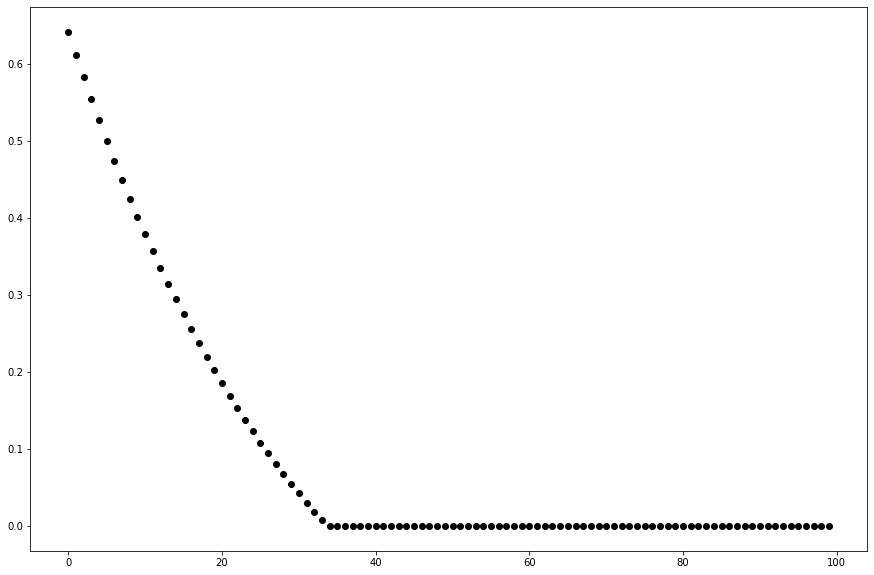

34


In [90]:
factor = 0.97
x = [i for i in range(100)]
ans = [y(factor, i) for i in x]
plt.scatter(x, ans, c = 'k')
plt.show()

for x, a in zip(x, ans):
    if a<=0:
        print(x)
        break


In [94]:
34/len(center_line)

0.096045197740113